# Gaussian histogram with numpy
- count the number of samples that fall into each bin, and graph the counts
- no explicit loops!


In [1]:
# setup

import numpy as np
import random
import matplotlib.pyplot as plt

# make plots render in the notebook, 
# instead of in an external window,
# which tends to be annoying
%matplotlib inline

# [np.random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html?highlight=random%20normal#numpy.random.normal)

In [2]:
# get some randoms

a=np.random.normal(size=100_000)
a,len(a)

(array([-1.25096872, -0.62963182,  0.00777228, ...,  1.43768831,
         0.4307927 , -0.06768811]), 100000)

# [np.absolute](https://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html?highlight=numpy%20abs)

In [3]:
# throw away big values
# use booleans

a2 = a[np.absolute(a) < 3]
a2, len(a2)

(array([-1.25096872, -0.62963182,  0.00777228, ...,  1.43768831,
         0.4307927 , -0.06768811]), 99712)

In [4]:
# make bins .2 wide

bucket = .2
# vector/scalar division
a2 /= bucket
a2, len(a2)

(array([-6.25484358, -3.1481591 ,  0.03886141, ...,  7.18844153,
         2.15396348, -0.33844056]), 99712)

# [np.trunc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trunc.html?highlight=trunc#numpy.trunc)
- discards fractional part

In [6]:
np.trunc([-4.345, 3.45])

array([-4.,  3.])

In [7]:
b = np.trunc(a2)
b, np.max(b), np.min(b)

(array([-6., -3.,  0., ...,  7.,  2., -0.]), 14.0, -14.0)

# [np.unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html)
- yields unique values and how many times they appear
- easy way to write rlencode

In [9]:
x,val = np.unique(b, return_counts=True)
len(x), len(val), x,val

(29,
 29,
 array([-14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
         -3.,  -2.,  -1.,  -0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
          8.,   9.,  10.,  11.,  12.,  13.,  14.]),
 array([  128,   203,   356,   601,   898,  1356,  1814,  2623,  3413,
         4424,  5255,  6208,  6914,  7576, 15920,  7627,  7111,  6191,
         5357,  4339,  3396,  2634,  1889,  1381,   886,   528,   379,
          199,   106]))

# [plt.bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

<BarContainer object of 29 artists>

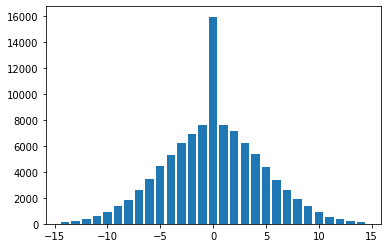

In [10]:
plt.bar(x, val)

# [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace)
- generates a mesh
- useful for evaluating vector functions

In [31]:
# np.sin is a vector function

x = np.linspace(0, np.pi/2, 10)
y = np.sin(x)
x,y

(array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
        0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633]),
 array([0.        , 0.17364818, 0.34202014, 0.5       , 0.64278761,
        0.76604444, 0.8660254 , 0.93969262, 0.98480775, 1.        ]))

In [45]:
def plotf(func, low, high):
    # func is function to plot
    # make a set of x vals
    x = np.linspace(low, high, 50)
    # vector eval the func on the x vals 
    # no loop!
    y = func(x)
    plt.plot(x, y, 'r', linewidth=10)
    plt.grid(True)

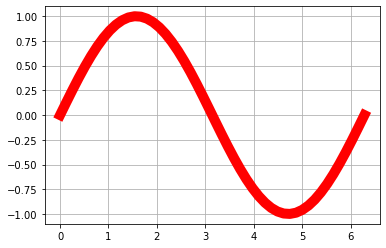

In [46]:
# test

plotf(np.sin, 0, np.pi*2)

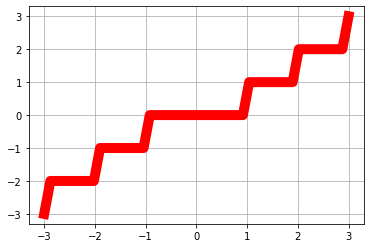

In [47]:
plotf(np.trunc, -3, 3)

In [48]:
# trunc does wrong thing for -1<x<0

np.trunc(.343), np.trunc(-.342)

(0.0, -0.0)

# use [np.floor](https://docs.scipy.org/doc/numpy/reference/generated/numpy.floor.html?highlight=floor#numpy.floor) instead of np.trunc

In [49]:
np.floor(.343), np.floor(-.342)

(0.0, -1.0)

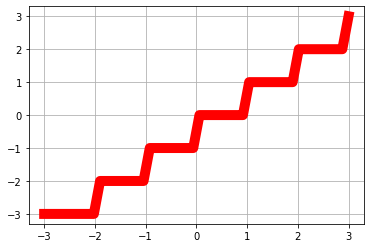

In [50]:
plotf(np.floor,-3,3)

<BarContainer object of 30 artists>

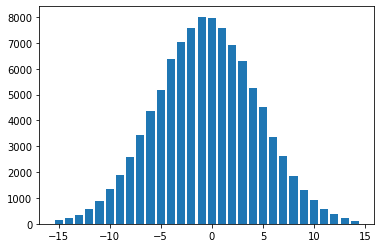

In [51]:
a=np.random.normal(size=100_000)
a2 = a[np.abs(a) < 3]
a2 /= bucket
a3 = np.floor(a2)
x,val = np.unique(a3, return_counts=True)
plt.bar(x , val)

<BarContainer object of 30 artists>

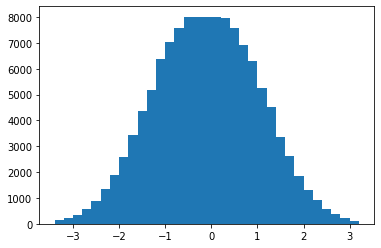

In [54]:
# another little bug - label x axis correctly
# why does look change??

plt.bar(x * bucket, val)

<BarContainer object of 30 artists>

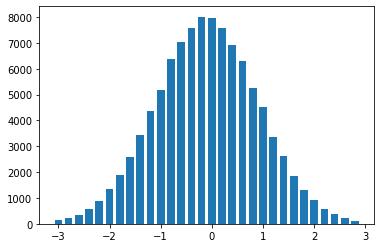

In [55]:
# fix bar width

plt.bar(x * bucket, val, width=.15)